In [1]:
#Step 1 : importation

#Scikit-learn is a free Python library for machine learning.
#MinMaxScaler is a class from sklearn.preprocessing which is used for normalization .
#We can apply the MinMaxScaler to the Sonar dataset directly to normalize the input variables.We will use the default configuration and scale values to the range 0 and 1. 
from sklearn.preprocessing import MinMaxScaler

import numpy as np
#Pandas is a Python library used for working with data sets. It has functions for analyzing, cleaning, exploring, and manipulating data. 
import pandas as pd


#TensorFlow is an open source framework developed by Google researchers to run machine learning, deep learning and other statistical and predictive analytics workloads
#The TensorFlow software handles data sets that are arrayed as computational nodes in graph form.
import tensorflow as tf
import seaborn as sns
import datetime

#Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, MaxPooling1D, Dropout , Conv1D

In [2]:
%load_ext tensorboard
print(tf.version.VERSION)

2.14.0


In [3]:
#Step 2 read data
df = pd.read_csv('TVT.csv' , parse_dates=['date'])

In [4]:
df

date  store  item  sales
0     2013-01-01      1     1     13
1     2013-01-02      1     1     11
2     2013-01-03      1     1     14
3     2013-01-04      1     1     13
4     2013-01-05      1     1     10
...          ...    ...   ...    ...
5573  2017-12-27      1     3     26
5574  2017-12-28      1     3     21
5575  2017-12-29      1     3     38
5576  2017-12-30      1     3     27
5577  2017-12-31      1     3     29

[5578 rows x 4 columns]

In [5]:
df.dtypes

date     object
store     int64
item      int64
sales     int64
dtype: object

In [6]:
df_store1_item1 =df.loc[df['item']==1].copy()
df_store1_item1.shape

(1859, 4)

In [7]:
df_store1_item1 =df.loc[df['item']==2].copy()
df_store1_item1.shape

(1859, 4)

In [8]:
item_daily_sales = df.groupby(['item', 'date'], as_index=False)['sales'].sum()

In [9]:
from plotly.offline import iplot
import plotly.graph_objects as go

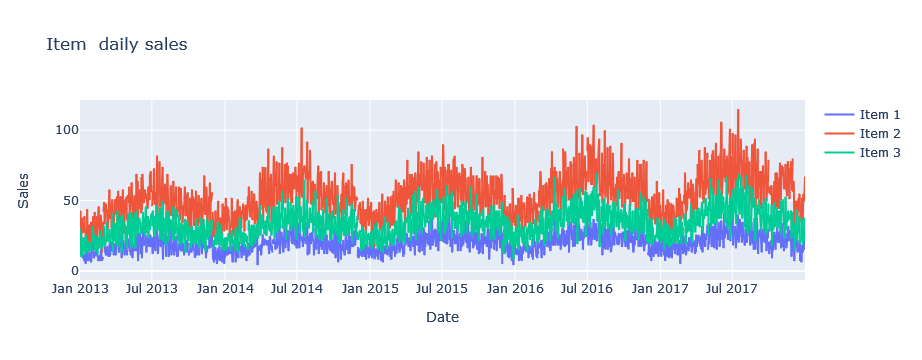

In [10]:
item_daily_sales_sc = []
for item in item_daily_sales['item'].unique():
    current_item_daily_sales = item_daily_sales[(item_daily_sales['item'] == item)]
    item_daily_sales_sc.append(go.Scatter(x=current_item_daily_sales['date'], y=current_item_daily_sales['sales'], name=('Item %s' % item)))

layout = go.Layout(title='Item  daily sales', xaxis=dict(title='Date'), yaxis=dict(title='Sales'))
fig = go.Figure(data=item_daily_sales_sc, layout=layout)
iplot(fig)

In [11]:
# Split the data into training, validation, and test sets
n = len(df)
n_train = int(0.8 * n)
n_test = int(0.15 * n)
n_val= n - (n_train + n_test)

In [12]:
train_data = df[:n_train].drop(columns=['date']).values
train_date = df[:n_train].drop(columns=['sales'])

test_data  = df[-n_test:].drop(columns=['date']).values
test_date  = df[-n_test:].drop(columns=['sales'])

val_data   = df[n_train:n_train+n_val].drop(columns=['date']).values
val_date   = df[n_train:n_train+n_val].drop(columns=['sales'])



In [13]:
def plot_series(time, series, lab, form='-', start=0, end=None):
    plt.plot(time[start:end], series[start:end], form, label=lab)
    plt.xlabel("date")
    plt.ylabel("sales")
    plt.grid(True)

In [14]:
#Step 4
# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
scaler = scaler.fit(train_data)

train_data_normalized1 = scaler.transform(train_data)
test_data_normalized1 = scaler.transform(test_data)
validation_data_normalized1 = scaler.transform(val_data)


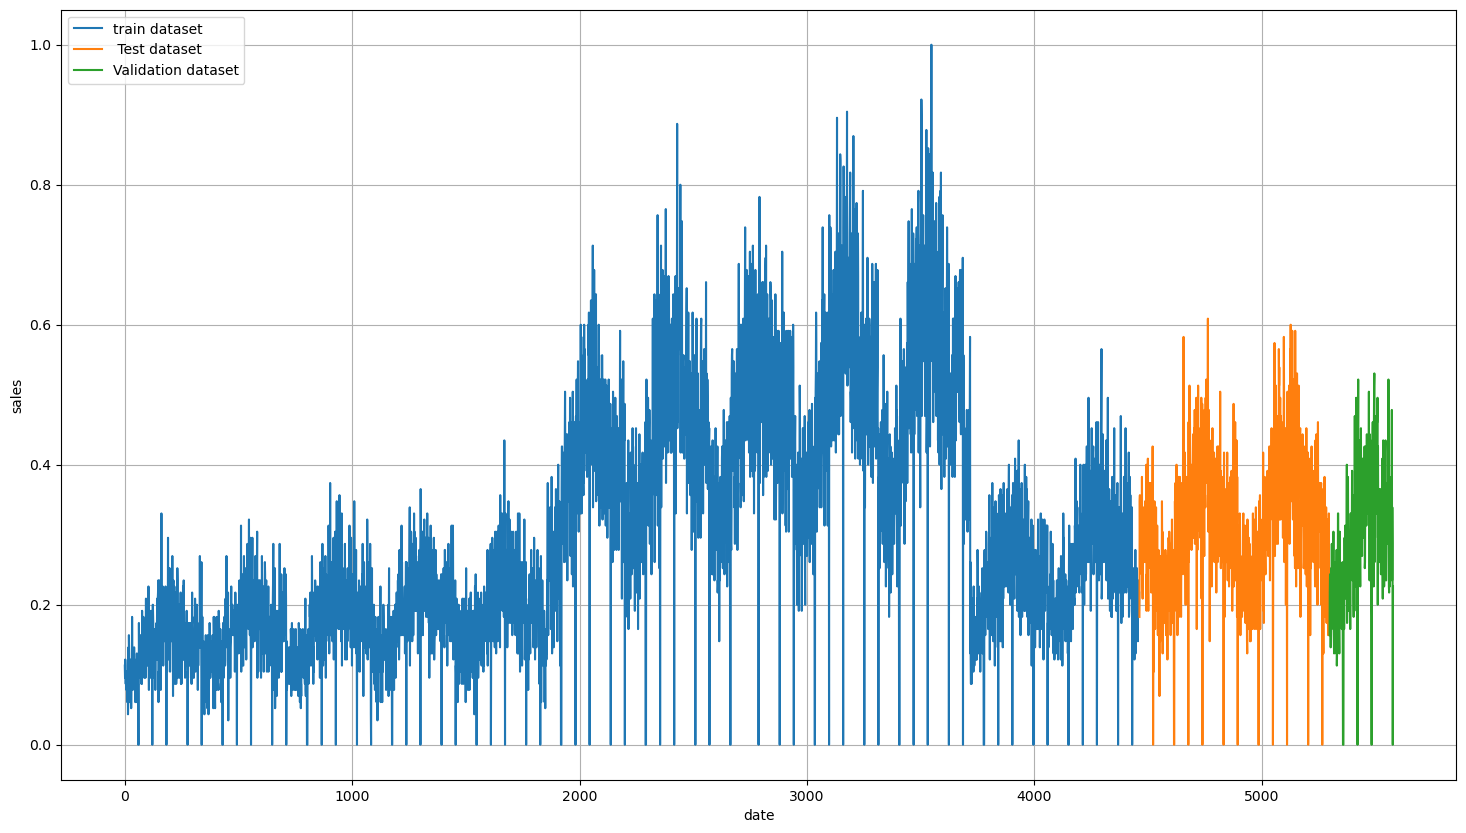

In [15]:


plt.figure(figsize=(18, 10))
plot_series(np.arange(train_data_normalized1.shape[0]), train_data_normalized1[:, -1], "train dataset")
plot_series(np.arange(train_data_normalized1.shape[0], (test_data_normalized1.shape[0] + train_data_normalized1.shape[0])), test_data_normalized1[:, -1], " Test dataset")
plot_series(np.arange((test_data_normalized1.shape[0] + train_data_normalized1.shape[0]), (test_data_normalized1.shape[0]+ train_data_normalized1.shape[0] + validation_data_normalized1.shape[0])), validation_data_normalized1[:, -1], "Validation dataset")
plt.legend(loc='upper left')



In [16]:
#Filtre notre data sur un seul item pour faire notre prediction = predction pour (x item)
#item1store1.csv
#item2store1.csv
#item3store1.csv

In [17]:
#read file item1
df1 = pd.read_csv('item1store1.csv' , sep=';')

In [18]:
df1

date  item1
0     01/01/2013     13
1     02/01/2013     11
2     03/01/2013     14
3     04/01/2013     13
4     05/01/2013      1
...          ...    ...
1853  27/12/2017     14
1854  28/12/2017     19
1855  29/12/2017     15
1856  30/12/2017     27
1857  31/12/2017     23

[1858 rows x 2 columns]

In [19]:
# Split the data into training, validation, and test sets for item 1 
n1 = len(df1)
n_train1 = int(0.8 * n1)
n_test1 = int(0.15 * n1)
n_val1 = n1 - (n_train1 + n_test1)


train_data1 = df1[:n_train1].drop(columns=['date']).values
train_date1 = df1[:n_train1].drop(columns=['item1'])

test_data1  = df1[-n_test1:].drop(columns=['date']).values
test_date1  = df1[-n_test1:].drop(columns=['item1'])

val_data1   = df1[n_train1:n_train1+n_val1].drop(columns=['date']).values
val_date1   = df1[n_train1:n_train1+n_val1].drop(columns=['item1'])

In [20]:
df1.shape

(1858, 2)

In [21]:
print('Train Set      : ',len(train_date1))
print('Test Set       : ',len(test_date1))
print('Validation Set : ',len(val_date1))


Train Set      :  1486
Test Set       :  278
Validation Set :  94


In [22]:
train_data1.shape

(1486, 1)

In [23]:
#Step 4
# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
scaler = scaler.fit(train_data1)

train_data_normalized = scaler.transform(train_data1)
test_data_normalized = scaler.transform(test_data1)
validation_data_normalized = scaler.transform(val_data1)


In [24]:
train_data_normalized

array([[0.30232558],
       [0.25581395],
       [0.3255814 ],
       ...,
       [0.48837209],
       [0.55813953],
       [0.3255814 ]])

In [25]:
#Create a windowed dataset for training
def create_window_dataset(ds, lb, window_size):
    windowed_dataset = []
    labels = []
    for i in range(window_size, ds.shape[0] + 1):
        windowed_dataset.append(ds[i - window_size:i])
        labels.append(lb[i - 1])
        
    return np.array(windowed_dataset), np.array(labels)

In [26]:
def tf_dataset(series_x, series_y, batch_size, shuffle_buffer, shuffle=True):
    ds = tf.data.Dataset.from_tensor_slices((series_x, series_y))
    if shuffle:
        ds = ds.cache().shuffle(shuffle_buffer).batch(batch_size).repeat()
    else:
        ds = ds.cache().batch(batch_size).repeat()

    return ds

In [27]:
window_size = 31
BATCH_SIZE = 64
windowed_dataset_train, labels_train = create_window_dataset( train_data_normalized[:, 0:-1],train_data_normalized[:, -1], window_size)

windowed_dataset_train, labels_train = create_window_dataset(train_data_normalized, train_data_normalized[:, -1], window_size)
train_set = tf_dataset(windowed_dataset_train, labels_train, BATCH_SIZE, 1000)
unshuffled_train_set = tf_dataset(windowed_dataset_train, labels_train, BATCH_SIZE, 1000, False)

windowed_dataset_test, labels_test = create_window_dataset(test_data_normalized, test_data_normalized[:, -1] , window_size)
test_set = tf_dataset(windowed_dataset_test, labels_test, BATCH_SIZE, 1000, False)

windowed_dataset_validation, labels_validation = create_window_dataset(validation_data_normalized,validation_data_normalized[:, -1] , window_size)
validation_set = tf_dataset(windowed_dataset_validation, labels_validation, BATCH_SIZE, 1000 ,False)


In [28]:
import math

In [29]:
TRAIN_STEP = math.ceil(windowed_dataset_train.shape[0] / BATCH_SIZE)
TEST_STEP = math.ceil(windowed_dataset_test.shape[0] / BATCH_SIZE)
VAL_STEP = math.ceil(windowed_dataset_validation.shape[0] / BATCH_SIZE)

In [30]:
window_size

31

In [31]:

input_shape = (window_size,1)


import tensorflow_addons as tfa
from tensorflow_addons.metrics import RSquare
 
from sklearn.metrics import explained_variance_score
# Initialisation du modèle



model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=64,
                           kernel_size=3,
                           strides=1,
                           padding="causal",
                           activation="relu",
                           input_shape=input_shape),
    tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding="valid"),
    
    
    tf.keras.layers.Conv1D(filters=32, kernel_size=1, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding="valid"),
    
    
    tf.keras.layers.LSTM(192, return_sequences=True),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.LSTM(128),
    
    
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1)
])


# Compile the model
model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tfa.optimizers.LazyAdam(0.001,0.9,0.999,1e-07,False),  # Utilize TFA optimizer
              metrics=['mse',RSquare(),'mae',explained_variance_score],
              run_eagerly=True )


model.summary()

   

C:\Users\sou21\anaconda3\Lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning:



TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 


C:\Users\sou21\anaconda3\Lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning:

Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.11.0 and strictly below 2.14.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.14.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a t

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 31, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1  (None, 30, 64)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 30, 32)            2080      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 29, 32)            0         
 g1D)                                                            
                                                                 
 lstm (LSTM)                 (None, 29, 192)           172800    
                                                                 
 dropout (Dropout)           (None, 29, 192)           0

In [33]:

history = model.fit(train_set,
                    epochs=60,
                    steps_per_epoch=TRAIN_STEP,
                    validation_data=validation_set,
                    validation_steps=VAL_STEP,
                    batch_size=BATCH_SIZE
                   )

Epoch 1/60
23/23 [==============================] - 11s 472ms/step - loss: 0.0335 - mse: 0.0335 - r_square: 0.1372 - mae: 0.1404 - explained_variance_score: 0.1416 - val_loss: 0.0258 - val_mse: 0.0258 - val_r_square: 0.0089 - val_mae: 0.1247 - val_explained_variance_score: 0.0126
Epoch 2/60
23/23 [==============================] - 11s 499ms/step - loss: 0.0329 - mse: 0.0329 - r_square: 0.1530 - mae: 0.1400 - explained_variance_score: 0.1544 - val_loss: 0.0247 - val_mse: 0.0247 - val_r_square: 0.0520 - val_mae: 0.1216 - val_explained_variance_score: 0.0520
Epoch 3/60
23/23 [==============================] - 11s 481ms/step - loss: 0.0332 - mse: 0.0332 - r_square: 0.1455 - mae: 0.1396 - explained_variance_score: 0.1930 - val_loss: 0.0243 - val_mse: 0.0243 - val_r_square: 0.0661 - val_mae: 0.1220 - val_explained_variance_score: 0.0705
Epoch 4/60
23/23 [==============================] - 11s 474ms/step - loss: 0.0325 - mse: 0.0325 - r_square: 0.1611 - mae: 0.1399 - explained_variance_score: 

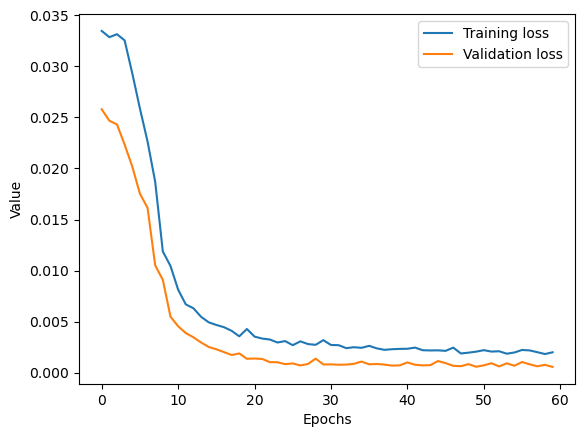

In [34]:
# Plot the training and validation metrics
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

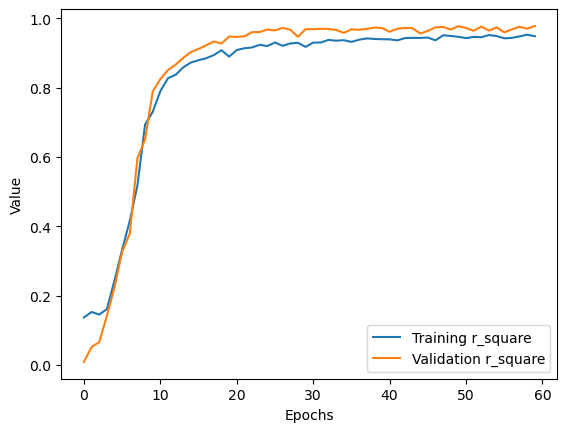

In [35]:
# Plot the training and validation metrics
plt.plot(history.history['r_square'], label='Training r_square')
plt.plot(history.history['val_r_square'], label='Validation r_square')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

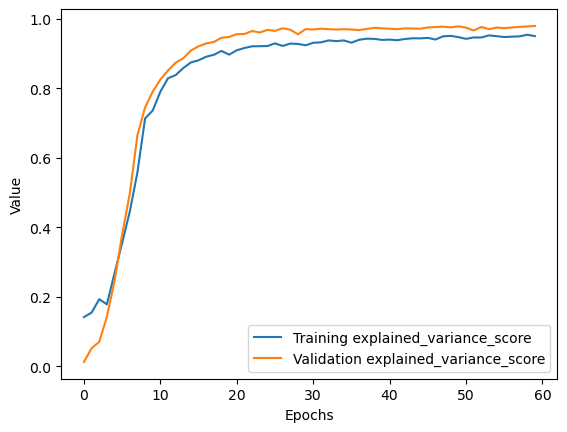

In [36]:
# Plot the training and validation metrics
plt.plot(history.history['explained_variance_score'], label='Training explained_variance_score')
plt.plot(history.history['val_explained_variance_score'], label='Validation explained_variance_score')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

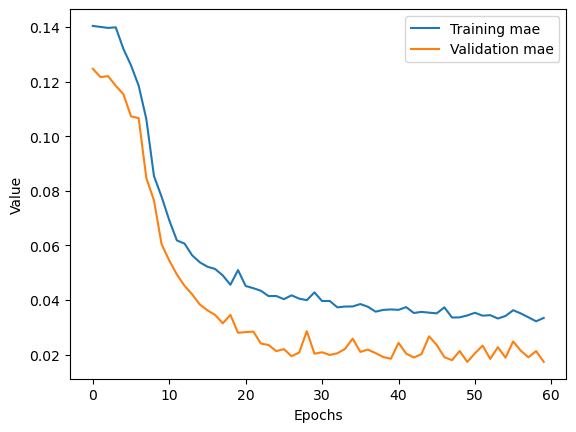

In [37]:
# Plot the training and validation metrics
plt.plot(history.history['mae'], label='Training mae')
plt.plot(history.history['val_mae'], label='Validation mae')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

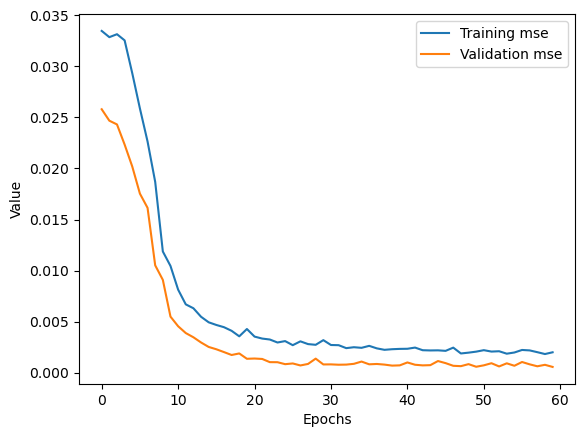

In [38]:
# Plot the training and validation metrics
plt.plot(history.history['mse'], label='Training mse')
plt.plot(history.history['val_mse'], label='Validation mse')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

In [39]:
#Save model weights
model.save_weights('weights/magazine_model_weights.ckpt')

In [40]:
#Load model weights

model.load_weights('weights/magazine_model_weights.ckpt')



In [41]:
forecast_train = model.predict(unshuffled_train_set, steps=TRAIN_STEP)
forecast_test = model.predict(test_set, steps=TEST_STEP)
forecast_validation= model.predict(validation_set, steps=VAL_STEP)


1/1 [==============================] - 0s 173ms/step


In [42]:
def get_metrics_result(metrics, true_labels, predicted_labels):    
    metrics_result = []
    for metric in metrics:
        metric.reset_states()
        metric.update_state(true_labels, predicted_labels)
        metrics_result.append(metric.result().numpy())
    
    return metrics_result

MAE    MSE  R_SQUARE
                                  
Train       0.016  0.000     0.989
Test        0.022  0.001     0.981
Validation  0.017  0.001     0.978

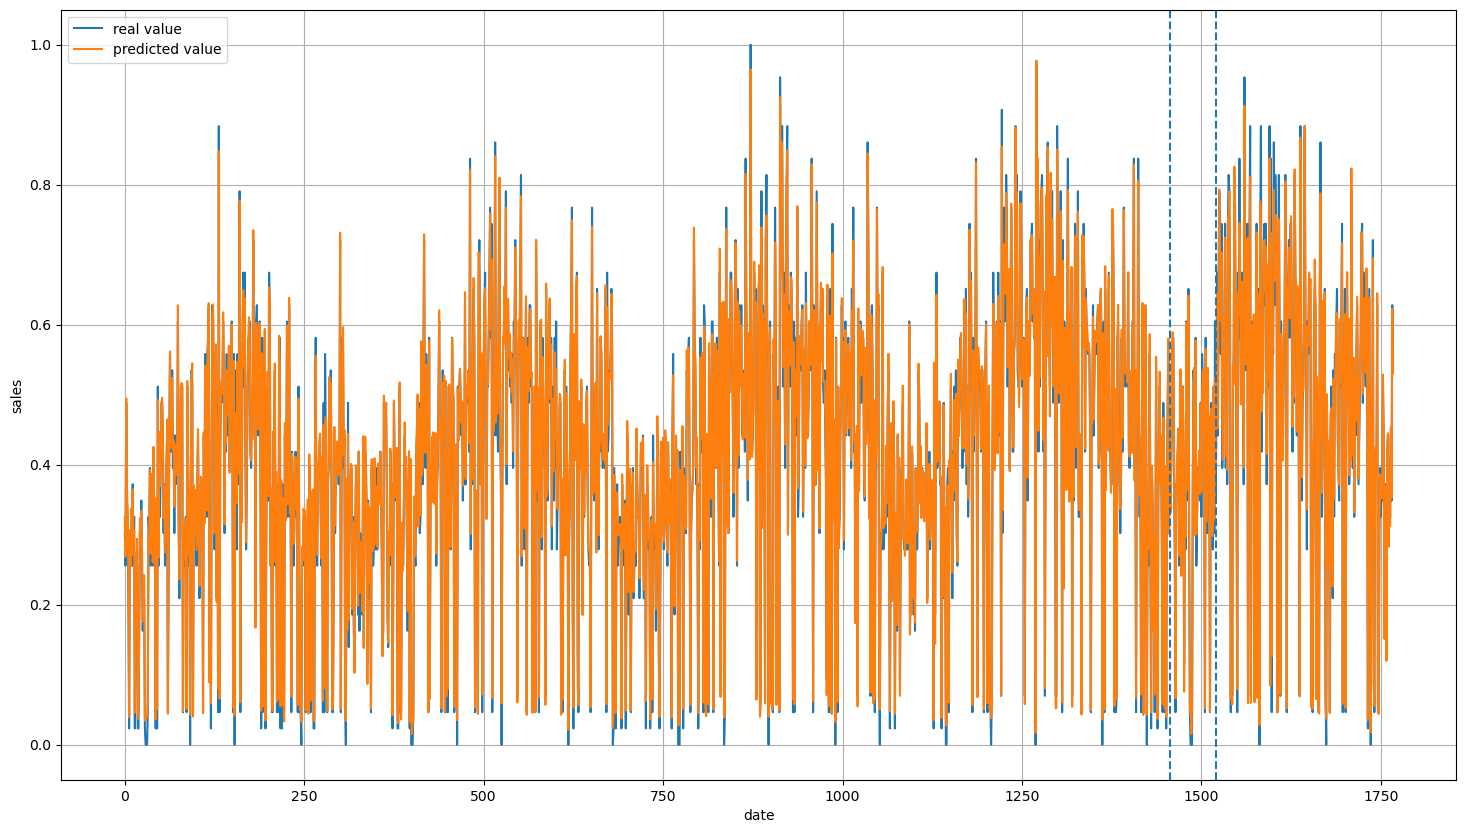

In [44]:
import sklearn

total_forecast = np.concatenate((forecast_train[:,0], forecast_validation[:,0], forecast_test[:,0]))
total_labels = np.concatenate((labels_train, labels_validation,labels_test))

plt.figure(figsize=(18, 10))
plot_series(np.arange(total_labels.shape[0]), total_labels, "real value")
plot_series(np.arange(total_labels.shape[0]), total_forecast, "predicted value")
xpositions = [labels_train.shape[0], (labels_train.shape[0] + labels_validation.shape[0])]
for xp in xpositions:
    plt.axvline(x=xp, linestyle='--')
plt.legend(loc='upper left')

metrics = [
    tf.keras.metrics.MeanAbsoluteError(),
    tf.keras.metrics.MeanSquaredError(),
    tfa.metrics.r_square.RSquare()
    #sklearn.metrics.explained_variance_score(total_forecast,total_labels)
    
]


train_metrics = get_metrics_result(metrics, labels_train, forecast_train[:,0])
train_metrics.insert(0, 'Train')

test_metrics = get_metrics_result(metrics, labels_test, forecast_test[:,0])
test_metrics.insert(0, 'Test')

val_metrics = get_metrics_result(metrics,labels_validation, forecast_validation[:,0])
val_metrics.insert(0, 'Validation')

COL_NAMES = ['', 'MAE', 'MSE', 'R_SQUARE']
metrics_table = pd.DataFrame([train_metrics, test_metrics, val_metrics], columns=COL_NAMES)
metrics_table = metrics_table.set_index([''])
metrics_table.round(3)


Train

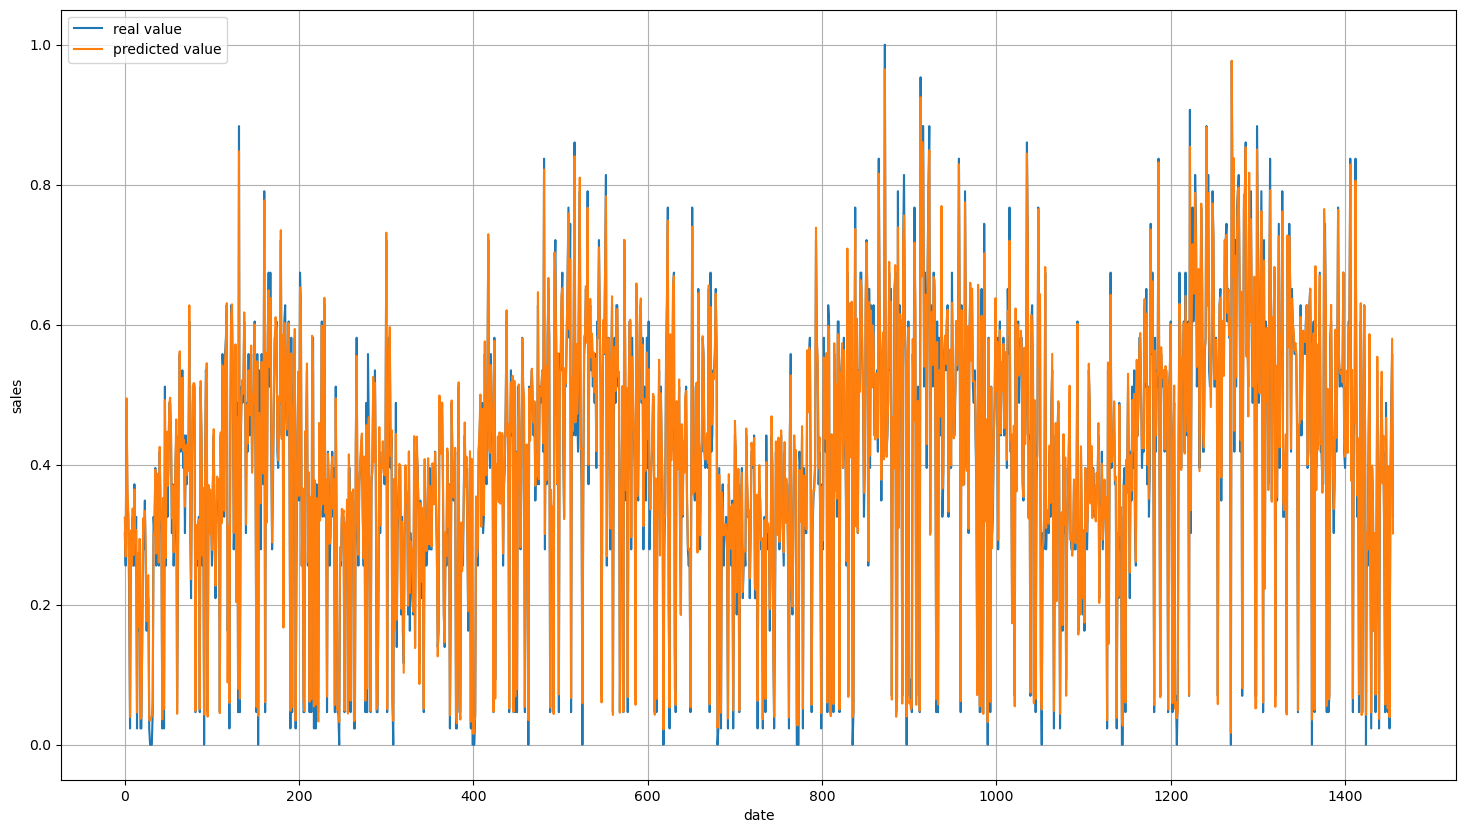

In [45]:
plt.figure(figsize=(18, 10))
plot_series(np.arange(labels_train.shape[0]), labels_train, "real value")
plot_series(np.arange(labels_train.shape[0]), forecast_train[:,0], "predicted value")
plt.legend(loc='upper left')

Test

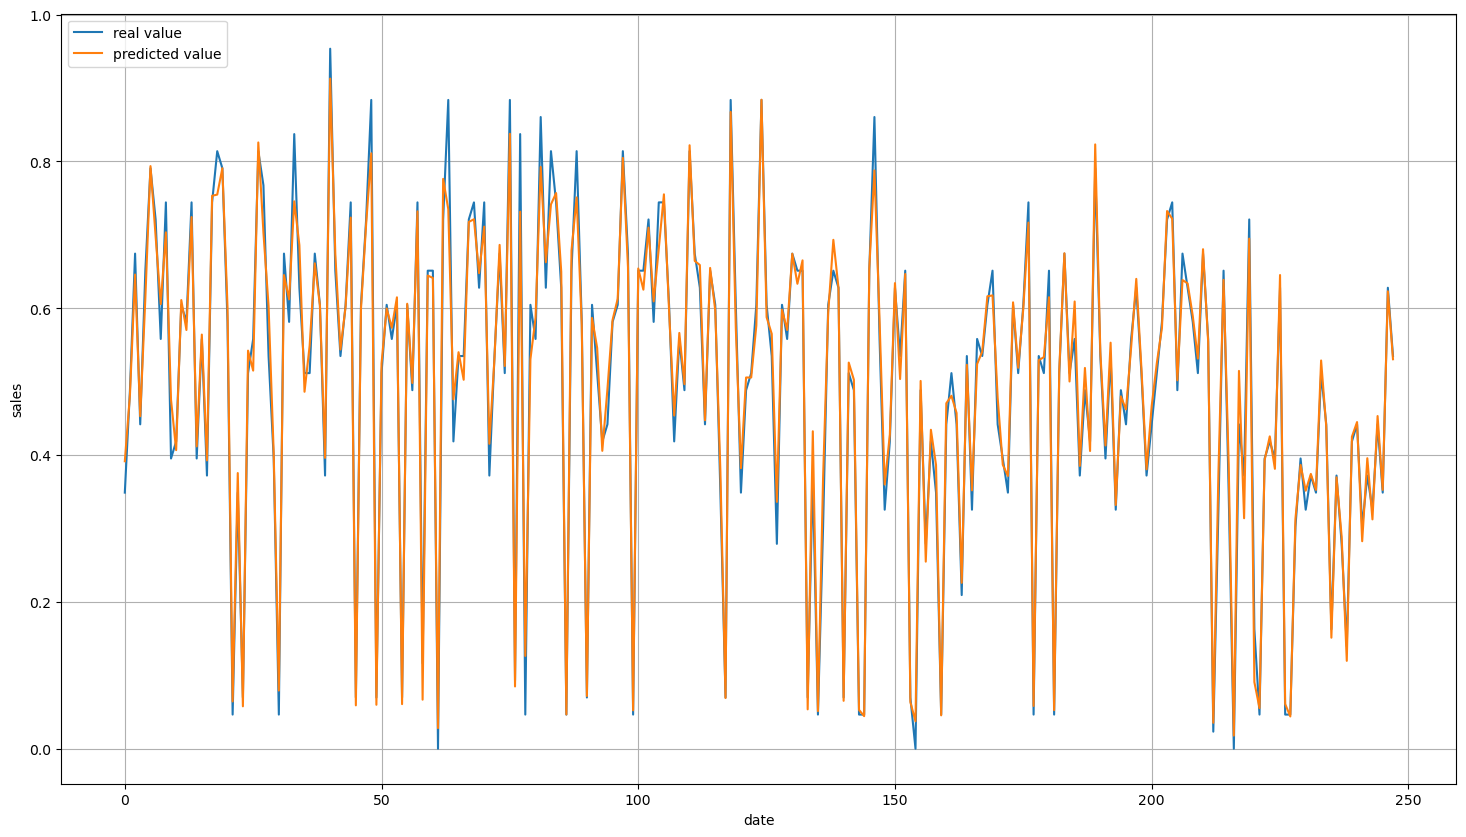

In [46]:
plt.figure(figsize=(18, 10))
plot_series(np.arange(labels_test.shape[0]), labels_test, "real value")
plot_series(np.arange(labels_test.shape[0]), forecast_test[:,0], "predicted value")
plt.legend(loc='upper left')

Validation

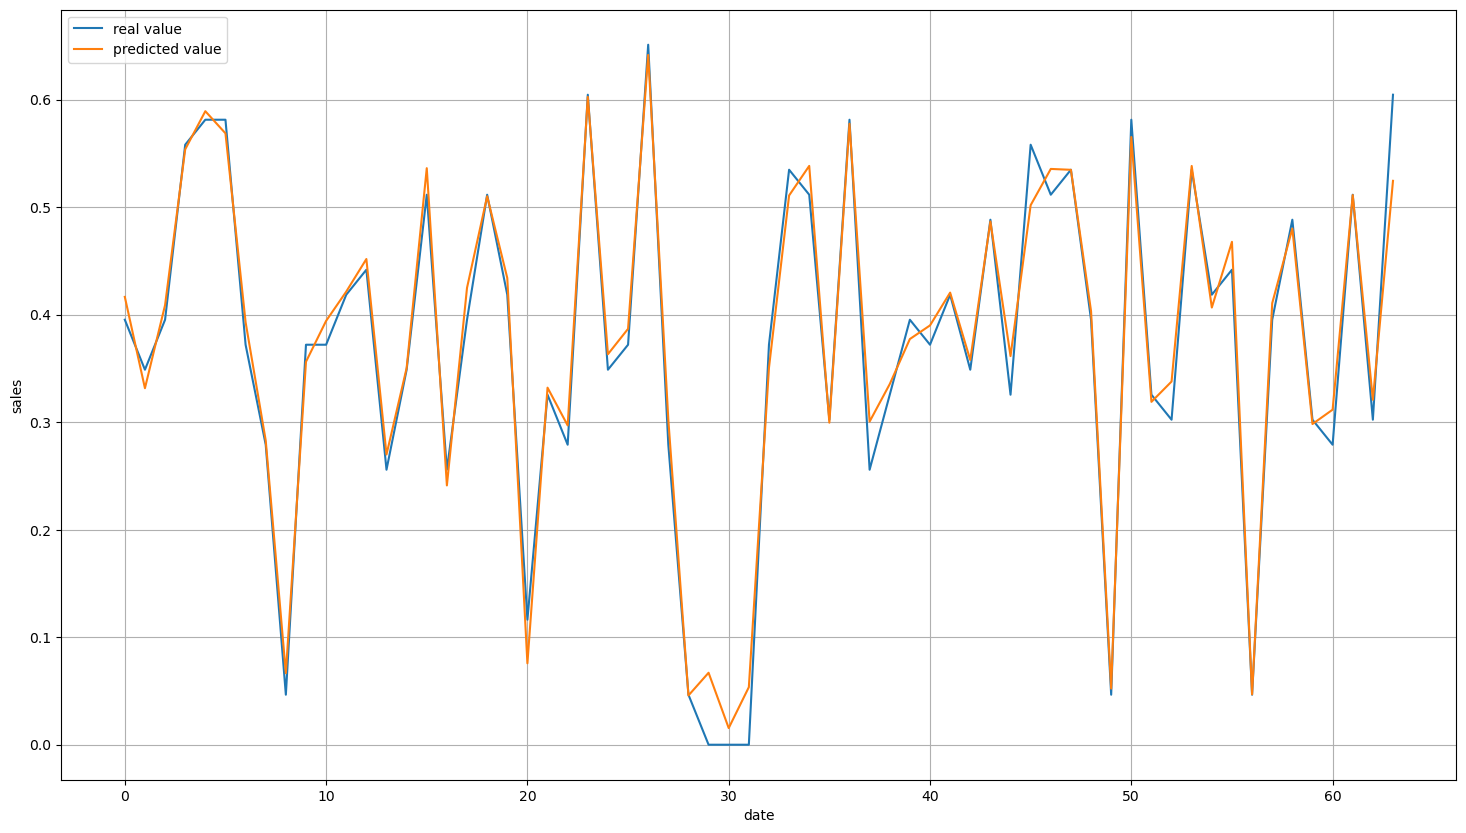

In [47]:
plt.figure(figsize=(18, 10))
plot_series(np.arange(labels_validation.shape[0]), labels_validation, "real value")
plot_series(np.arange(labels_validation.shape[0]), forecast_validation[:,0], "predicted value")
plt.legend(loc='upper left')